In [23]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

1. Prepare data

2. Design the model

3. Loss and optimizer

4. Training loop

In [24]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=7)

In [25]:
X_numpy.shape

(100, 1)

In [26]:
y_numpy.shape

(100,)

In [30]:
X_numpy[0].dtype

dtype('float64')

In [31]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [32]:
y = y.view(y.shape[0], 1)

In [33]:
n_samples, n_features = X.shape

In [34]:
input_size = n_features
output_size = 1

In [35]:
learning_rate = 0.01

In [36]:
model = nn.Linear(input_size, output_size)

In [37]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

epoch: 100, loss = 450.8584
epoch: 200, loss = 374.8160
epoch: 300, loss = 373.6662
epoch: 400, loss = 373.6486
epoch: 500, loss = 373.6484
epoch: 600, loss = 373.6484
epoch: 700, loss = 373.6483
epoch: 800, loss = 373.6484
epoch: 900, loss = 373.6484
epoch: 1000, loss = 373.6484


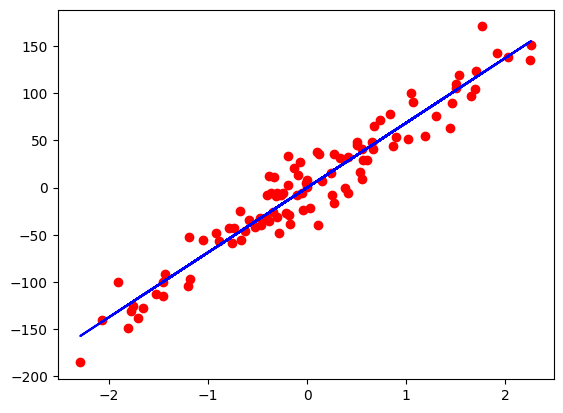

In [38]:
num_epochs = 1000
for epoch in range(num_epochs):
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)
    # backward pass
    loss.backward()
    #update weights
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1) % 100 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()